<a href="https://colab.research.google.com/github/smpark0520/ESAA/blob/main/%ED%95%B8%EC%A6%88%EC%98%A8_4%EC%9E%A5_%EB%AA%A8%EB%8D%B8_%ED%9B%88%EB%A0%A8_p_184_203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.5 규제가 있는 선형 모델

- 과대적합을 감소시키는 방법 -> 모델을 규제
- How? 자유도를 줄이자! 즉, 다항식의 차수를 줄이면 된다!!

## 4.5.1 릿지 회귀

- 릿지 회귀 : L2 정규화를 적용하여 과적합을 방지하는 선형 회귀 모델
- 규제항이 비용함수에 추가

식 4-8 릿지 회귀의 비용 함수  
$$ J(\theta) = MSE(\theta) + \frac{1}{2} \alpha \sum_{i=1}^{n} \theta_i^2 $$


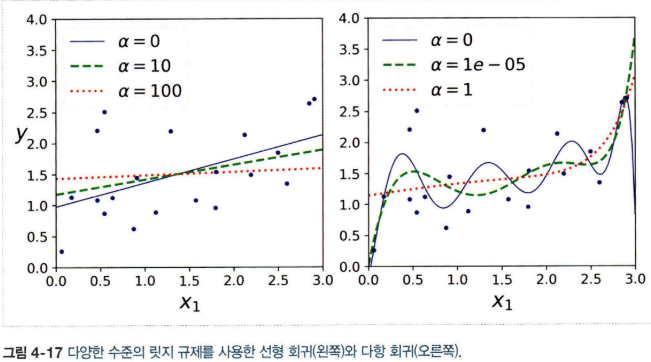

식 4-9 릿지 회귀의 정규방정식  
$$ \hat{\theta} = (X^T X + \alpha A)^{-1} X^T y $$



In [54]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([5.65270733])

- solver="cholesky" : $X^T X \theta = X^T y$ 정규방정식을 Cholesky 분해로 푸는 방식.
$X$가 선형 독립적인(즉, 다중공선성이 없는) 경우 빠르게 계산
- 1.5라는 새로운 입력값에 대한 y값을 예측


In [55]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.62425122])

- 확률적 경사 하강법을 사용했을 때

# 4.5.2 라쏘 회귀

- 선형 회귀의 또 다른 규제된 버전
- 가중치 벡터의 l1 norm 사용

식 4-10 라쏘 회귀의 비용 함수  
$$ J(\theta) = MSE(\theta) + \alpha \sum_{i=1}^{n} |\theta_i| $$


- 덜 중요한 특성의 가중치를 제거(가중치=0)
자동으로 특성 선택하고 희소 모델을 만듦
예를 들어 다항 특성의 가중치를 모두 0으로 만들어 선형적으로 함
- 등고선: l1, l2 손실함수 / 노란점선: 경사하강법으로 파라미터 최적화 / 하얀 원: 경사하강법이 초기화된 모델 파라미터 최적화 / 빨간 점: 전역 최적점

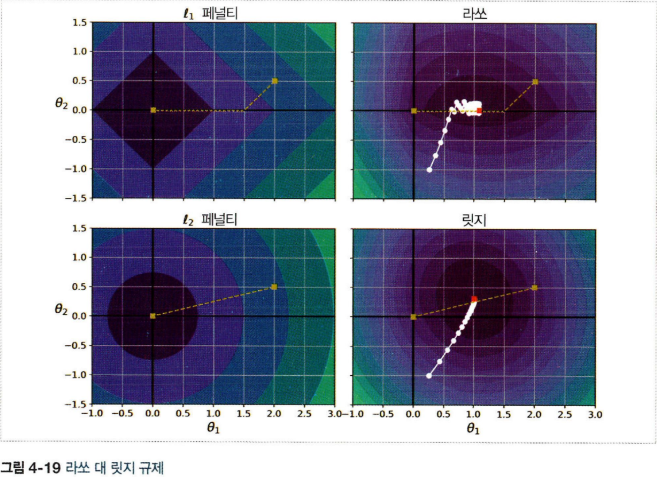

- 라쏘: α를 증가하면 전역 최적점이 노란 점선을 따라 오른쪽으로 이동 / 릿지: α증가하면 최적점이 원점에 가까워짐(완전한 0은 아님)
- 릿지 특징: l2 손실은 원점에 가까울수록 줄어듦. 파라미터가 지역 최적점에 가까워질수록 그래디언트가 작아져서 경사하강법이 느려지고 진동없이 수렴함(라쏘는 진동)

### 식 4-11 라쏘 회귀의 서브그레이디언트 벡터  

$$
g(\boldsymbol{\theta}, J) = \nabla_{\boldsymbol{\theta}} MSE(\boldsymbol{\theta}) + \alpha
\begin{bmatrix}
\text{sign}(\theta_1) \\
\text{sign}(\theta_2) \\
\vdots \\
\text{sign}(\theta_n)
\end{bmatrix}
$$

여기서,

$$
\text{sign}(\theta_i) =
\begin{cases}
-1, & \theta_i < 0 \\
0, & \theta_i = 0 \\
+1, & \theta_i > 0
\end{cases}
$$


In [56]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([5.61355382])

# 4.5.3 엘라스틱넷

- 릿지 & 라쏘 회귀를 절충한 모델
- 규제항 : 릿지 + 회귀
- 혼합 비율 r을 사용해 조절
 - r=0:엘라스틱넷 = 릿지회귀
 - r=1:엘라스틱넷 = 라쏘 회귀

### 식 4-12 엘라스틱넷 비용 함수  

$$
J(\boldsymbol{\theta}) = MSE(\boldsymbol{\theta}) + r\alpha \sum_{i=1}^{n} |\theta_i| + \frac{(1 - r)\alpha}{2} \sum_{i=1}^{n} \theta_i^2
$$


언제 사용?

- 대부분 경우 : 릿지
- 신경 쓰이는 특성이 몇 개 안될 때 : 라쏘, 엘라스틱
 - 특성 수 > 훈련 샘플 수 or 특성 몇 개가 강하게 연관 : 엘라스틱넷

In [57]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.61147602])

# 4.5.4 조기 종료

- 조기 종료 : 경사 하강법같은 반복적인 학습 알고리즘을 규제하는 방법 -> 검증 에러가 최솟값에 도달하면 바로 훈련 중지

In [61]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)
from sklearn.preprocessing import StandardScaler

In [63]:
from sklearn.base import clone

# 데이터 준비
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled,y_train.ravel()) # 룬련 이어서 진행
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

# 4.6 로지스틱 회귀

- 샘플이 특 정 클래스에 속할 확률을 추정하는 데 널리 사용
 - 추정 확률 50% 이상 : 샘플이 해당 클래스에 속한다고 예측(레이블이 '1'인 양성 클래스positive class)
 - 추정 확률 50% 이하 : 클래스에 속하지 않는다고 예측(레이블이 '0'인 음성 클래스negative class)

## 4.6.1 확률 추정

### 식 4-13 로지스틱 회귀 모델의 확률 추정 (벡터 표현식)

$$
\hat{p} = h_{\theta} (x) = \sigma (\theta^{T} x)
$$

### 식 4-14 로지스틱 함수

$$
\sigma(t) = \frac{1}{1 + \exp(-t)}
$$


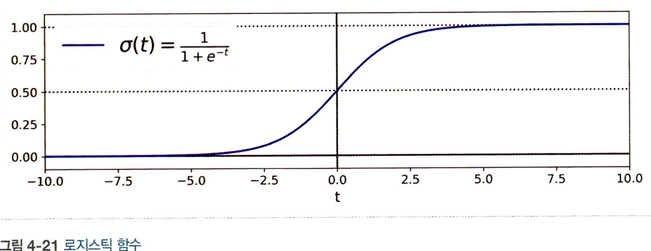

로지스틱 회귀 모델이 샘플 $X$가 양성 클래스에 속할 확률을 추정:  

### 식 4-15 로지스틱 회귀 모델 예측  

$$
\hat{y} =
\begin{cases}
0, & \hat{p} < 0.5 \\
1, & \hat{p} \geq 0.5
\end{cases}
$$

즉,  

$$
\theta^T x < 0 \Rightarrow \sigma(\theta^T x) < 0.5
$$

$$
\theta^T x \geq 0 \Rightarrow \sigma(\theta^T x) \geq 0.5
$$

따라서 로지스틱 회귀 모델은 $ \theta^T x $가 양수일 때 $1$ (양성 클래스)이라고 예측하고,  
음수일 때 $0$ (음성 클래스)이라고 예측

## 4.6.2 훈련과 비용 함수

식 4-16 하나의 훈련 샘플에 대한 비용 함수

$$
c(\theta) =
\begin{cases}
-\log(\hat{p}) & \text{if } y = 1 \\
-\log(1 - \hat{p}) & \text{if } y = 0
\end{cases}
$$

- 전체 훈련 세트의 비용함수(=로그손실): 모든 훈련 샘플 비용을 평균한 것. 최솟값을 계산하는 해는 없으나 볼록 함수이므로 경사하강법으로 전역 최솟값을 찾을 수 있음

식 4-17 로지스틱 회귀의 비용 함수 (로그 손실)

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{p}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{p}^{(i)}) \right]
$$


식 4-18 로지스틱 비용 함수의 편도함수

$$
\frac{\partial}{\partial \theta} J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left( \sigma(\theta^T x^{(i)}) - y^{(i)} \right) x^{(i)}
$$

- 각 샘플에 대해 예측 오차를 계산하고, j번째 특성값을 곱해서 모든 훈련 샘플에 대해 평균을 냄

## 4.6.3 결정 경계

- 붓꽃 데이터셋 3개 품종( Iris-Setosa, Iris-Versicolor, Iris-Virginica)으로 로지스틱 회귀 설명
- 꽃잎의 너비를 기반으로 Iris-Versicolor 종을 감지하는 분류기 만들기

In [77]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [78]:
X = iris["data"][:, 3:] #꽃잎의 너비
y = (iris["target"] == 2).astype(int) #1 Iris-Virginica면 1, 그렇지 않으면 0

In [71]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

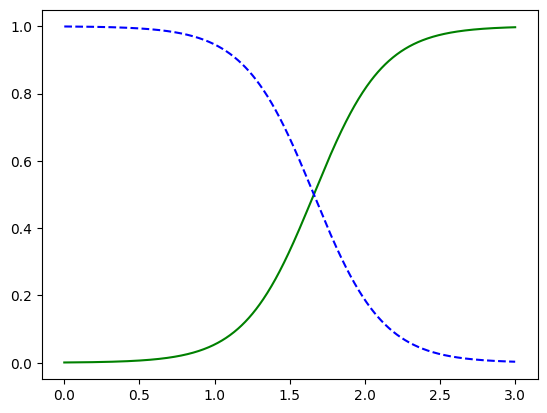

In [72]:
# 꽃잎의 너비가 0~3cm인 꽃에 대해 모델의 추정 확률
import matplotlib.pyplot as plt
import numpy as np

X_new = np.linspace(0, 3, 1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")

# 다음은 이미지를 미려하게 출력하기 위한 맷플롯립 코드가 이어집니다.

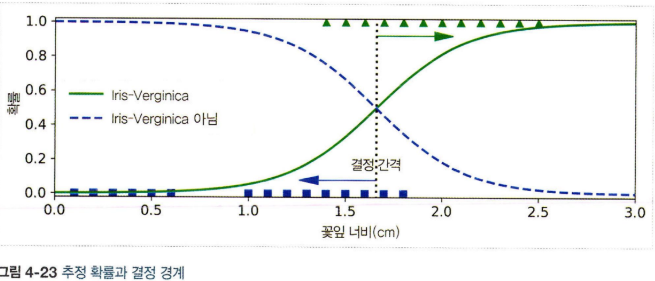

- 점선: 모델이 50%확률을 추정하는 지점 = 결정 경계
- 결정경계가 선형임. 추정 확률도 선형

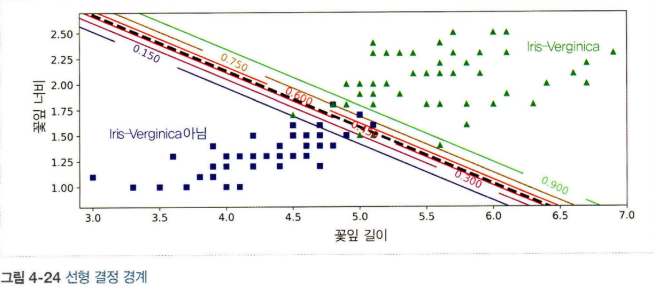

- 로지스틱 회귀 모델도 l1, l2 규제 가능. 사이킷런은 l2 규제가 기본(C 파라미터로 조절)

# 4.6.4 소프트맥스 회귀

### 소프트맥스 회귀 / 다항 로지스틱 회귀

- 로지스틱 회귀 모델을 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화한 방법

1. **소프트맥스 회귀 모델**은 각 클래스 $k$에 대한 점수 $s_k(x)$를 계산
2. 그런 다음, 이 점수에 소프트맥스 함수(정규화된 지수 함수)를 적용하여 각 클래스의 확률을 추정

### 클래스에 대한 소프트맥스 점수

소프트맥스 점수는 다음과 같이 정의됩니다:

$$
s_k(x) = (\theta^{(k)})^T x
$$

여기서:
- $s_k(x)$는 클래스 $k$에 대한 점수
- $(\theta^{(k)})^T$는 클래스 $k$의 파라미터 벡터의 전치
- $x$는 입력 벡터


- 각 클래스의 파라미터 벡터 -> 파라미터 행렬로 저장됨
- 소프트맥스 함수: 각 점수에 지수 함수를 적용한 후 정규화함. 추정 확률이 가장 높은 클래스를 선택함

### 소프트맥스 함수

소프트맥스 함수는 다음과 같이 정의됩니다:

$$
\hat{P_k} = \sigma(s(x)) = \frac{\exp(s_k(x))}{\sum_{j=1}^{K} \exp(s_j(x))}
$$

여기서:
- $\hat{P_k}$ : 샘플 $x$가 클래스 $k$에 속할 확률
- $s(x)$ : 샘플 $x$에 대한 각 클래스의 점수를 담은 벡터
- $\sigma(s(x))$ : 샘플 $x$에 대한 각 클래스의 점수가 주어졌을 때 이 샘플이 클래스 $k$에 속할 확률을 추정한 값
- $K$ : 클래스의 총 개수

### 소프트맥스 회귀 분류기의 예측

$$
\hat{y}  = \arg\max_k \sigma(s(x)) = \arg\max_k s_k(x) = \arg\max_k (\theta^{(k)})^T x
$$

여기서:
- $j$ : 예측된 클래스
- $\arg\max_k$ : 클래스 $k$에 대해 최대값을 가지는 인덱스를 찾는 연산자
- $\sigma(s(x))$ : 샘플 $x$에 대한 소프트맥스 점수
- $s_k(x)$ : 클래스 $k$에 대한 점수
- $(\theta^{(k)})^T x$ : 클래스 $k$의 파라미터 벡터와 입력 벡터의 내적


- argmax연산 : 추정확률이 최대인 k값을 반환
- 훈련방법: 모델이 타깃 클래스에 대해 높은 확률을 추정하도록 만드는 것이 목적. 크로스 엔트로피 비용함수를 최소화

- 크로스 엔트로피 비용함수: 낮은 확률을 예측하는 모델을 억제. 추정된 타깃 클래스의 확률이 얼마나 잘 맞는지 측정하는 용도로 사용. 두개의 클래스(k=2)일 때 로지스틱 회귀의 비용함수와 같음

### 크로스 엔트로피 비용 함수

$$
J(\Theta) = -\frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y^{(i)}_k \log(\hat{p}_k^{(i)})
$$

여기서:
- $m$은 샘플의 총 수
- $K$는 클래스의 총 개수
- $y^{(i)}_k$는 $i$번째 샘플에 대한 실제 클래스 $k$의 값 (원-핫 인코딩)
- $\hat{p}_k^{(i)}$는 $i$번째 샘플에 대한 클래스 $k$의 예측 확률
- $\log(\hat{p}_k^{(i)})$는 클래스 $k$의 예측 확률에 대한 로그

- 각 클래스에 대한 크로스 엔트로피의 그레이디언트 벡터를 계산해, 비용함수를 최소화하도록 경사하강법을 이용해 파라미터 행렬Θ을 찾음

### 클래스에 대한 크로스 엔트로피의 그레이디언트 벡터

크로스 엔트로피의 그레이디언트 벡터는 다음과 같이 정의됩니다:

$$
\nabla_{\Theta} J(\Theta) = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{p}_k^{(i)} - y_k^{(i)} \right) x^{(i)}
$$

여기서:
- $\nabla_{\Theta} J(\Theta)$ : 크로스 엔트로피 비용 함수의 그레이디언트 벡터,
- $m$ : 샘플의 총 수
- $\hat{p}_k^{(i)}$ : $i$번째 샘플에 대한 클래스 $k$의 예측 확률
- $y_k^{(i)}$ : $i$번째 샘플에 대한 클래스 $k$의 실제 값 (원-핫 인코딩)
- $x^{(i)}$ : $i$번째 샘플의 입력 벡터

In [73]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [74]:
X = iris["data"][:, (2, 3)] # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, multi_class='multinomial')

In [75]:
softmax_reg.predict([[5, 2]])

array([2])

In [76]:
softmax_reg.predict_proba([[5, 2]])

array([[6.21626375e-07, 5.73689803e-02, 9.42630398e-01]])

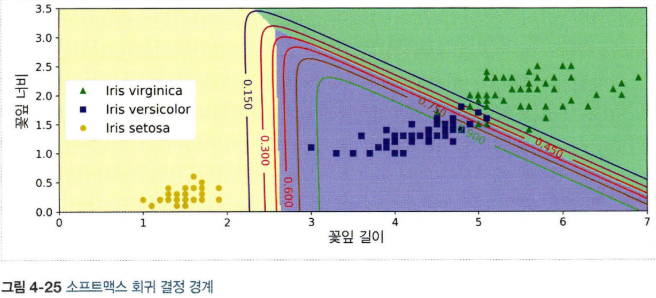

- 소프트맥스 회귀 결정경계: 배경색으로 구분해 보면 결정 경계는 모두 선형이고 클래스에 대한 확률(색 곡선)은 곡선임. 추정확률이 50% 이하인 클래스로도 예측가능